# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [97]:
#Importando pacotes e banco de dados:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [98]:
data = pd.read_csv('/content/drive/My Drive/dados_exercicio_7.csv')

In [99]:
#Listando todos os valores unicos das variaveis que serão transformadas:
[data['tipo_renda'].unique(), data['educacao'].unique(), data['estado_civil'].unique(), data['tipo_residencia'].unique()]

[array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
        'Student'], dtype=object),
 array(['Secondary / secondary special', 'Higher education',
        'Incomplete higher', 'Lower secondary', 'Academic degree'],
       dtype=object),
 array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
        'Separated'], dtype=object),
 array(['House / apartment', 'Rented apartment', 'Municipal apartment',
        'With parents', 'Co-op apartment', 'Office apartment'],
       dtype=object)]

In [100]:
#Convertendo todas as variaveis para dummies:
data.mau = data.mau.map({True: 1, False:0})
data.tipo_renda = data.tipo_renda.map({'Working': 1, 'Commercial associate': 2, 'State servant': 3, 'Pensioner': 4,'Student': 5})
data.educacao = data.educacao.map({'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4,'Academic degree': 5})
data.estado_civil = data.estado_civil.map({'Married':1, 'Single / not married':2, 'Civil marriage':3, 'Widow':4,'Separated':5})
data.tipo_residencia = data.tipo_residencia.map({'House / apartment': 1, 'Rented apartment': 2, 'Municipal apartment': 3, 'With parents': 4,'Co-op apartment': 5, 'Office apartment': 6})
data['qt_pessoas_residencia'] = data['qt_pessoas_residencia'].astype(int)

#Transformando em inteiros:
data['idade'] = data['idade'].astype(int)
data['tempo_emprego'] = data['tempo_emprego'].astype(int)
data

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,1,1,1,1,58,3,1,0,0,0,2,0
1,1,0,1,0,2,1,2,1,52,8,1,0,1,1,1,0
2,1,0,1,0,2,1,2,1,52,8,1,0,1,1,1,0
3,0,1,1,0,1,2,1,1,46,2,1,1,1,1,2,0
4,1,1,0,0,1,3,1,1,29,3,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,1,1,3,1,54,9,1,0,0,0,2,1
16646,1,0,1,0,2,1,1,1,43,7,1,1,1,0,2,1
16647,0,1,1,0,1,1,1,1,30,9,1,1,0,0,2,1
16648,0,1,1,0,1,1,1,1,30,9,1,1,0,0,2,1


In [119]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(data.drop('mau',axis=1), data.mau, test_size=0.3, random_state=100)



#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

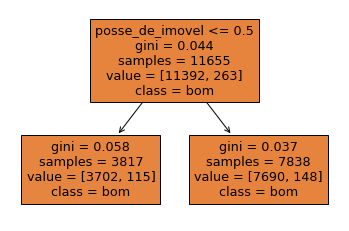

In [120]:
clf = DecisionTreeClassifier(random_state=100)
clf1 = clf.fit(df_train_x[['posse_de_imovel']], df_train_y)

plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=['posse_de_imovel']);

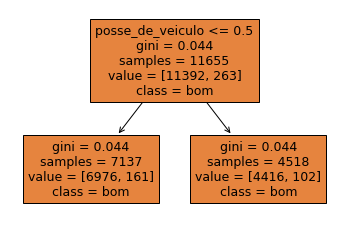

In [121]:
clf2 = DecisionTreeClassifier(random_state=100)
clf2 = clf.fit(df_train_x[['posse_de_veiculo']], df_train_y)

plot_tree(clf2,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=['posse_de_veiculo']);

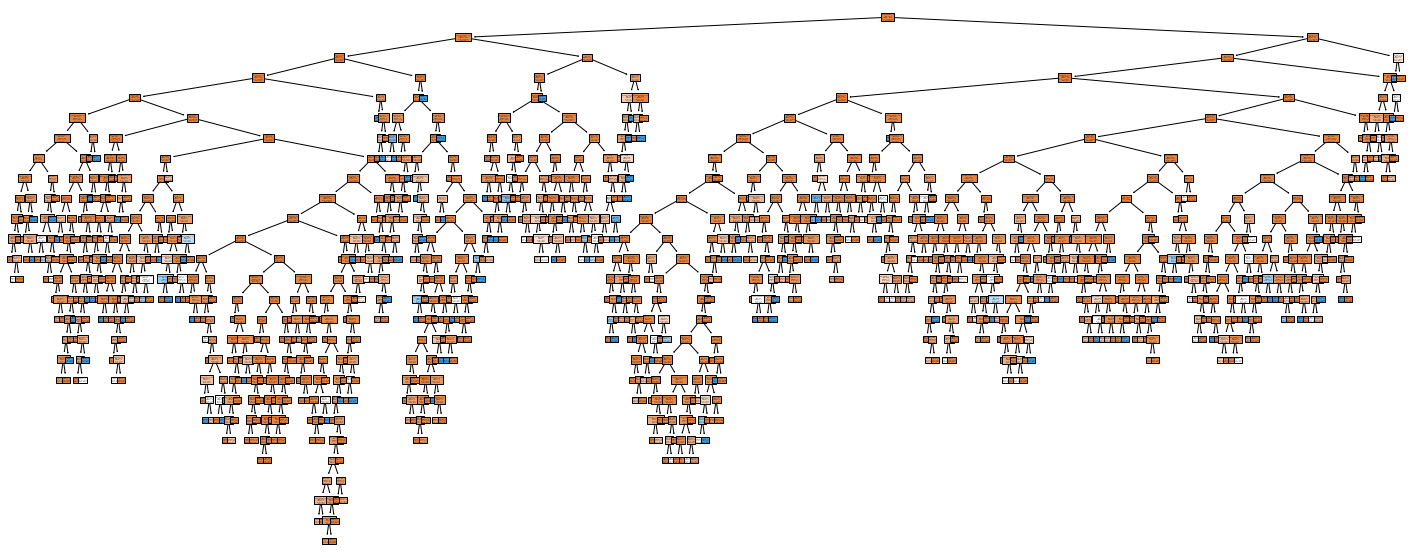

In [122]:
clf3 = clf.fit(df_train_x, df_train_y)

plt.figure(figsize=(25, 10))
plot_tree(clf3,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=df_train_x.columns);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


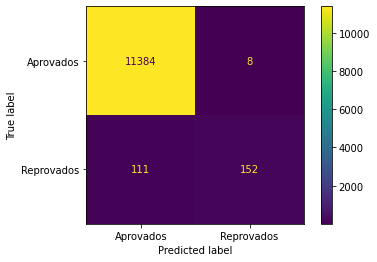

In [123]:
#Matriz de confusão para o treino com todas as variaveis:
plot_confusion_matrix(clf3, df_train_x, df_train_y, display_labels=['Aprovados', 'Reprovados']);

In [124]:
#Valor predito e acuracia para o teste
y_chapeu_treino = clf3.predict(df_train_x)
accuracy_score(df_train_y, y_chapeu_treino)


0.9897897897897898

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


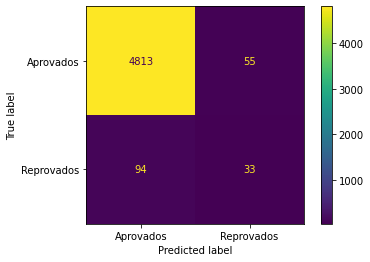

In [125]:
#Matriz de confusão teste:
plot_confusion_matrix(clf3, df_test_x, df_test_y, display_labels=['Aprovados', 'Reprovados']);

In [126]:
#Valor predito e acuracia para o teste
y_chapeu_teste = clf3.predict(df_test_x)
accuracy_score(df_test_y, y_chapeu_teste)

#Treinamento obteve uma acuracia maior.

0.9701701701701702

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


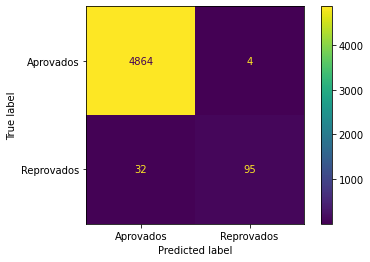

In [127]:
clf_3 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 5, random_state=123)
clf_3 = clf3.fit(df_test_x, df_test_y)
plot_confusion_matrix(clf_3, df_test_x, df_test_y, display_labels=['Aprovados', 'Reprovados']);


4896

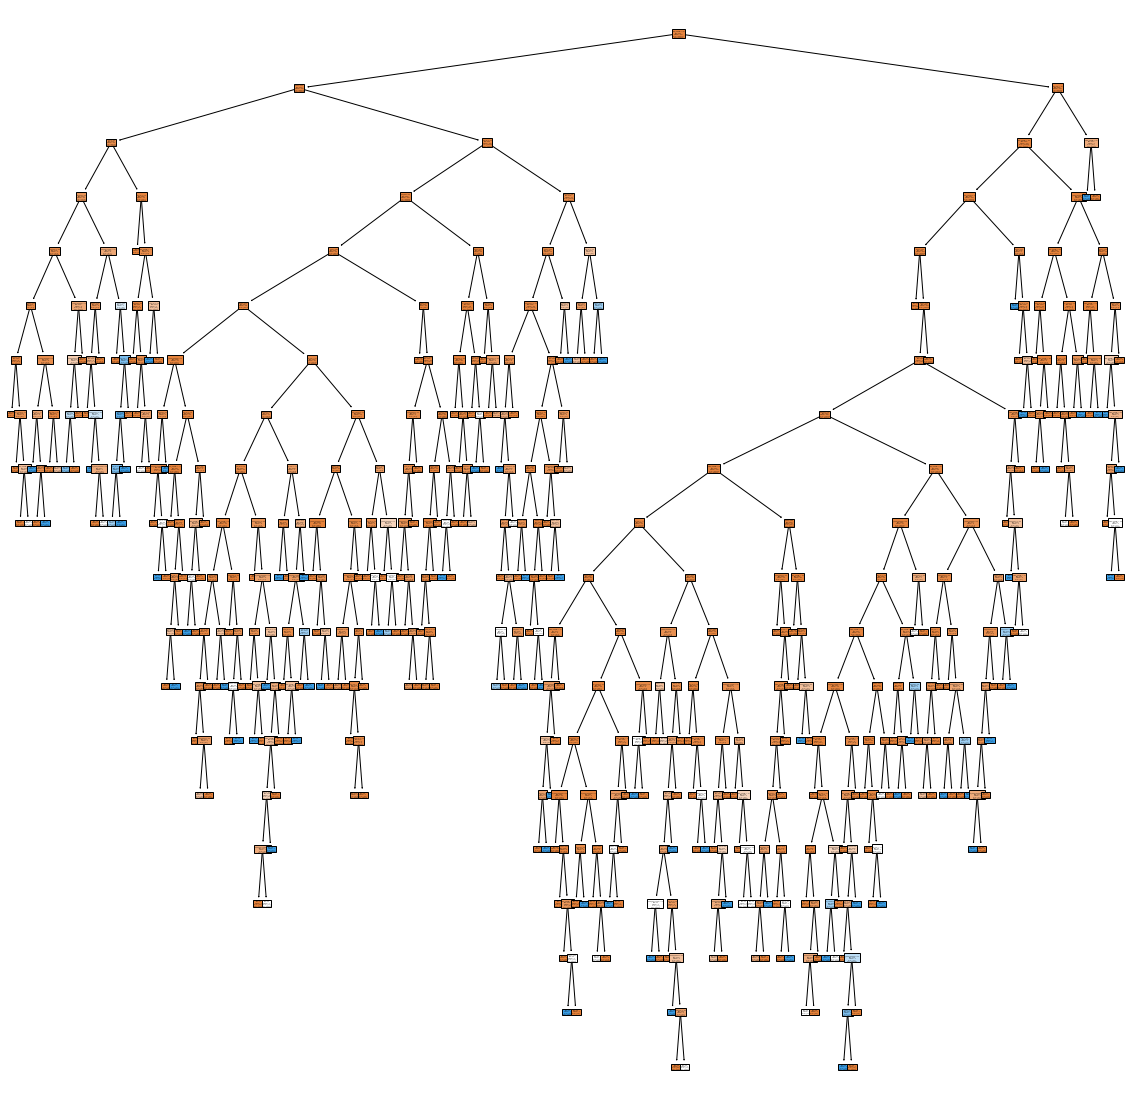

In [128]:
plt.figure(figsize=(20, 20))
plot_tree(clf_3,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=df_train_x.columns);
4864+32


In [115]:
#Acuracia com todos os resultados como aprovados:
#Resultado sera encontrado dividindo todos os reias aprovados pelo total de observações:
4896/4995 #0.9802

0.9801801801801802